In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
x = np.random.rand(100, 1)
y =  2*x + 4 + np.random.rand(100, 1)

m=0
c=0
l=0.3
n=float(len(x))
epoch=1000
for i in range(len(x)):
    y_pred=m*x+c
    d_c=(-1/n)*sum(y-y_pred)
    d_m=(-1/n)*sum(x*(y-y_pred))
    m=m-l*d_m
    c=c-l*d_c
print(m,c)

[1.97548641] [4.53834859]


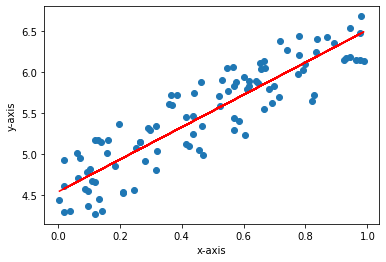

In [3]:
plt.scatter(x,y)
plt.plot(x,y_pred,color="red")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

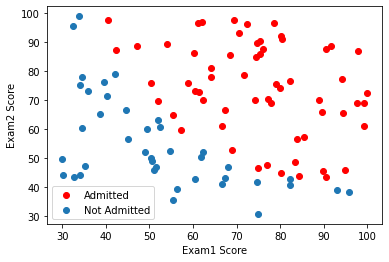

In [34]:
data = pd.read_csv("ex2data1.txt", header=None)
X = data.values[:, :-1]
y = data.values[:, -1]
pos, neg = (y==1).reshape(100, 1), (y==0).reshape(100, 1)
plt.scatter(X[pos[:, 0], 0], X[pos[:, 0], 1], c='r',  label="Admitted")
plt.scatter(X[neg[:, 0], 0], X[neg[:, 0], 1],  label="Not Admitted")
plt.xlabel("Exam1 Score")
plt.ylabel("Exam2 Score")
plt.legend(loc=0)

In [35]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def Costfunction(X, y, theta):
    m=len(y)
    
    h_theta = sigmoid(X@theta)
    y_pos = -y.T @ np.log(h_theta) #y_pos = (-y * np.log(predictions)) 
    y_neg = (1-y).T @ np.log(1-h_theta) #y_neg = ((1-y)*np.log(1-predictions))
    error = y_pos - y_neg 
    
    cost = 1/m * sum(error)
    grad = 1/m * (X.T@(h_theta - y))
    
    return cost[0] , grad

In [36]:
def featureNormalization(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_Norm = (X - mu)/sigma
    return X_Norm, mu, sigma
m, n = X.shape
X, mu, sigma = featureNormalization(X)
X = np.column_stack((np.ones((m, 1)), X))
y = y.reshape(m, 1)
initial_theta = np.zeros((n+1, 1))
cost, grad= Costfunction(X, y, initial_theta)
print("Cost of initial theta is", cost)
print("Gradient at initial theta (zeros):", grad)

Cost of initial theta is 0.6931471805599453
Gradient at initial theta (zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [37]:
def gradientDescent(X, y, theta, alpha, n_iters):
    m=len(y)
    J_history =[]
    
    for i in range(n_iters):
        cost, grad = Costfunction(X, y, theta)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    return theta,J_history
theta, J_history = gradientDescent(X=X, y=y, theta=initial_theta, alpha=1, n_iters=400)

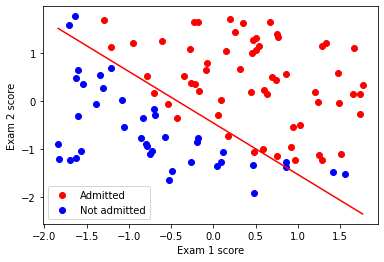

In [38]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",label="Not admitted")
x_value = np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value = -(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "r")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

In [39]:
x_sample = np.array([45, 85])
x_sample = featureNormalization(x_sample)[0]
x_sample = np.append(np.ones(1), x_sample)
prob = sigmoid(x_sample.dot(theta))
print("For a student with scores 45 and 85, we predict an admission probability of ",prob[0])
def predict(X, theta):
    p = sigmoid(X@theta) >= 0.37
    return p
p=predict(X,theta)
print("Train Accuracy:", sum(p==y)[0],"%")

For a student with scores 45 and 85, we predict an admission probability of  0.8015327860552117
Train Accuracy: 92 %
